# Notebook for preparing and saving MOLECULAR (ZINC full) graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download ZINC full dataset

In [2]:
if not os.path.isfile('molecules_zinc_full.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/grhitgnuuixoxwl/molecules_zinc_full.zip?dl=1 -o molecules_zinc_full.zip -J -L -k
    !unzip molecules_zinc_full.zip -d ../
    # !tar -xvf molecules_zinc_full.zip -C ../
else:
    print('File already downloaded')
    

File already downloaded


# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/local/home/mamien/Uni/Master-Project/graphtransformer


In [4]:
import pickle

%load_ext autoreload
%autoreload 2

from data.molecules import MoleculeDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.molecules import MoleculeDataset


In [6]:
DATASET_NAME = 'ZINC-full'
dataset = MoleculeDatasetDGL(DATASET_NAME) 

preparing 220011 graphs for the TRAIN set...
preparing 24445 graphs for the VAL set...
preparing 5000 graphs for the TEST set...
Time taken: 2458.5985s


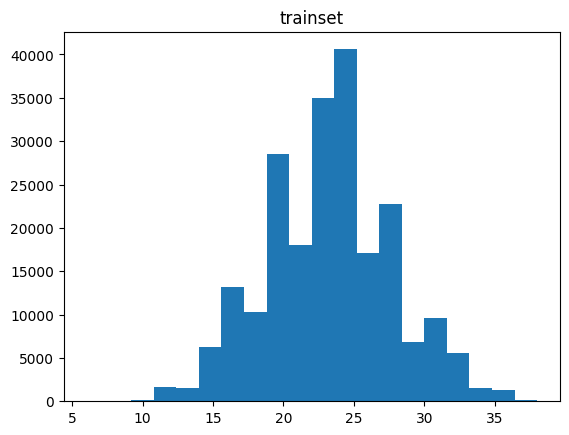

min/max : 6 38


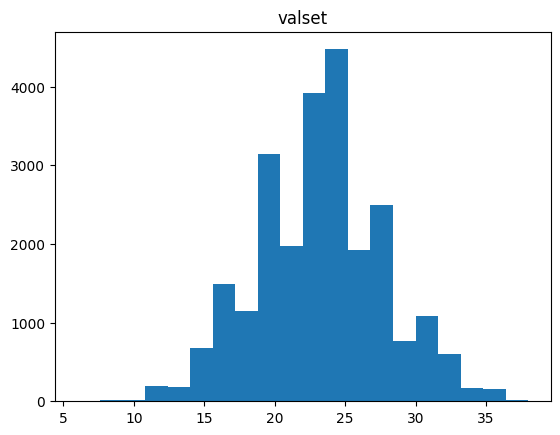

min/max : 6 38


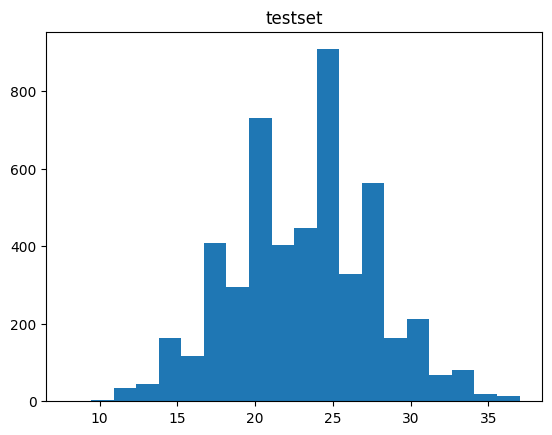

min/max : 8 37


In [7]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [8]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


220011
24445
5000
(Graph(num_nodes=33, num_edges=72,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([3.0464]))
(Graph(num_nodes=21, num_edges=44,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([2.0992]))
(Graph(num_nodes=24, num_edges=52,
      ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
      edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([3.1382]))


In [9]:
num_atom_type = 28
num_bond_type = 4


In [10]:
start = time.time()
with open('data/molecules/ZINC-full.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start)


Time (sec): 114.77823567390442


# Test load function

In [11]:
DATASET_NAME = 'ZINC-full'
dataset = LoadData(DATASET_NAME)
print(dataset)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset ZINC-full...
train, test, val sizes : 220011 5000 24445
[I] Finished loading.
[I] Data load time: 134.7488s


In [12]:
batch_size = 10
collate = MoleculeDataset.collate
print(MoleculeDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.molecules.MoleculeDataset'>
